In [ ]:
# 필요한 패키지 임포트
import gym
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# 상태와 각 액션의 확률값을 입력받으면 이미지를 그려주는 함수를 정의해 보자
def draw_state(state, q_table):
    img = np.zeros((401, 401, 3))
    # 배경을 그리도록 하자
    for i in range(4):
        cv2.line(img, ((i+1)*100, 0), ((i+1)*100, 400), (255, 255, 255), 1)
        cv2.line(img, (0, (i+1)*100), (400, (i+1)*100), (255, 255, 255), 1)
    # H와 G를 적어준다
    cv2.putText(img, 'H', (1*100+10, 1*100+80), cv2.FONT_HERSHEY_COMPLEX, 
                3, (255, 0, 0))
    cv2.putText(img, 'H', (3*100+12, 1*100+80), cv2.FONT_HERSHEY_COMPLEX, 
                3, (255, 0, 0))
    cv2.putText(img, 'H', (3*100+12, 2*100+80), cv2.FONT_HERSHEY_COMPLEX, 
                3, (255, 0, 0))
    cv2.putText(img, 'H', (0*100+12, 3*100+80), cv2.FONT_HERSHEY_COMPLEX, 
                3, (255, 0, 0))
    cv2.putText(img, 'G', (3*100+12, 3*100+80), cv2.FONT_HERSHEY_COMPLEX, 
                3, (0, 255, 0))
    # Agent 위치 표시
    row = state//4
    col = state%4
    cv2.circle(img, (col*100+50, row*100+50), 15, (0, 0, 255), -1)
    # P Table 표시
    for i in range(16):
        if (i == 5 or i == 7 or i == 11 or i == 12 or i == 15):
            continue
        row = i//4
        col = i%4
        cv2.putText(img, str(round(q_table[i][0], 3)), (col*100+1, row*100+55), 
                    cv2.FONT_HERSHEY_COMPLEX, 0.3, (255, 255, 255))
        cv2.putText(img, str(round(q_table[i][1], 3)), (col*100+40, row*100+90), 
                    cv2.FONT_HERSHEY_COMPLEX, 0.3, (255, 255, 255))
        cv2.putText(img, str(round(q_table[i][2], 3)), (col*100+70, row*100+55), 
                    cv2.FONT_HERSHEY_COMPLEX, 0.3, (255, 255, 255))
        cv2.putText(img, str(round(q_table[i][3], 3)), (col*100+40, row*100+10), 
                    cv2.FONT_HERSHEY_COMPLEX, 0.3, (255, 255, 255))
    return img

# 문자열을 적으면 이미지로 변경해 주는 함수를 정의해 주자
def draw_txt(txt):
    img = np.zeros((401, 401, 3))
    cv2.putText(img, txt, (10, 200), 
                cv2.FONT_HERSHEY_COMPLEX, 1.5, (255, 255, 255))
    return img

3000번 시도 중 25.0번 성공!
성공률은 0.83% 입니다.


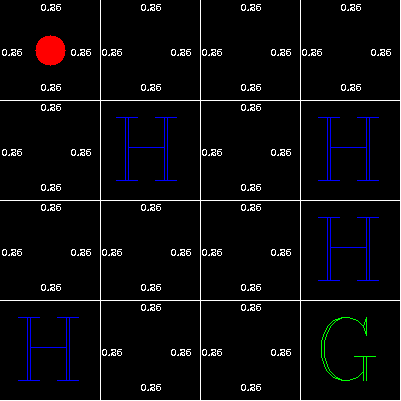

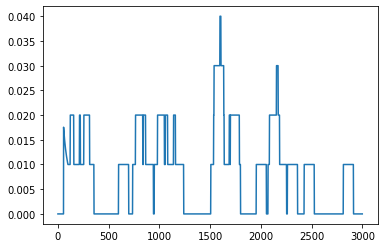

In [ ]:
# 파라미터를 설정해 주자
num_episode = 3000
is_video_save = False
fps = 1
avi_file_name = 'P-rl-1.avi'

# 미끄럽지 않은 환경을 만들어주자
env = gym.make('FrozenLake-v0', is_slippery=False)
# 초기에 각 액션의 확률은 1/4로 맞춰준다.
p_table = np.zeros((16, 4))
for i in range(16):
    for j in range(4):
        p_table[i, j] = 0.25

if (is_video_save):
    fcc = cv2.VideoWriter_fourcc(*'DIVX')
    out = cv2.VideoWriter(avi_file_name, fcc, fps, (401, 401))

reward_list = []
reward_100_average = []

for epi in range(num_episode):
    if (is_video_save):
        txt = 'Episode : '+str(epi)
        for _ in range(3):
            out.write(np.uint8(draw_txt(txt)))
    d = False
    total_reward = 0
    s = env.reset()
    while not d:
        if (is_video_save):
            out.write(np.uint8(draw_state(s, p_table)))
        action = np.random.choice(range(4), p=p_table[s])
        n_s, r, d, _ = env.step(action)
        total_reward = total_reward+r
        s = n_s

    reward_list.append(total_reward)

    if (is_video_save):
        out.write(np.uint8(draw_state(s, p_table)))
    if (total_reward == 1):
        txt = 'Success'
    else:
        txt = 'Fail'
    if (is_video_save):
        for _ in range(3):
            out.write(np.uint8(draw_txt(txt)))
    # print(epi,np.average(reward_list[-100:]))
    reward_100_average.append(np.average(reward_list[-100:]))

if (is_video_save):
    txt = 'Success : '+str(np.sum(reward_list))
    for _ in range(3):
        out.write(np.uint8(draw_txt(txt)))
    out.release()

print('{}번 시도 중 {}번 성공!'.format(num_episode, np.sum(reward_list)))
print('성공률은 {}% 입니다.'.format(round(np.sum(reward_list)/num_episode*100, 2)))
cv2_imshow(draw_state(0, p_table))
plt.plot(reward_100_average)

10000번 시도 중 228.0번 성공!
성공률은 2.28% 입니다.


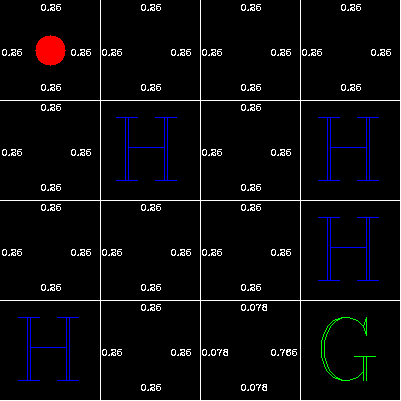

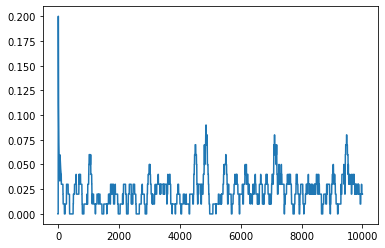

In [ ]:
# 파라미터를 설정해 주자
num_episode = 10000
is_video_save = False
fps = 1
avi_file_name = 'P-rl-2.avi'
# 칭찬할 때 쓰이는 비율이다.
learning_rate = 0.01

# 미끄럽지 않은 환경을 만들어주자
env = gym.make('FrozenLake-v0', is_slippery=False)
# 초기에 각 액션의 확률은 1/4로 맞춰준다.
p_table = np.zeros((16, 4))
for i in range(16):
    for j in range(4):
        p_table[i, j] = 0.25

if (is_video_save):
    fcc = cv2.VideoWriter_fourcc(*'DIVX')
    out = cv2.VideoWriter(avi_file_name, fcc, fps, (401, 401))

reward_list = []
reward_100_average = []

for epi in range(num_episode):
    if (is_video_save):
        txt = 'Episode : '+str(epi)
        for _ in range(3):
            out.write(np.uint8(draw_txt(txt)))
    d = False
    total_reward = 0
    s = env.reset()
    while not d:
        if (is_video_save):
            out.write(np.uint8(draw_state(s, p_table)))
        action = np.random.choice(range(4), p=p_table[s])
        n_s, r, d, _ = env.step(action)
        total_reward = total_reward+r
        if (r == 1):
            log_p_table = np.log(p_table[s])
            log_p_table[action] = log_p_table[action]+learning_rate
            s_sum = np.sum(np.exp(log_p_table))
            for i in range(4):
                p_table[s, i] = np.exp(log_p_table[i])/s_sum
        s = n_s

    reward_list.append(total_reward)

    if (is_video_save):
        out.write(np.uint8(draw_state(s, p_table)))
    if (total_reward == 1):
        txt = 'Success'
    else:
        txt = 'Fail'
    if (is_video_save):
        for _ in range(3):
            out.write(np.uint8(draw_txt(txt)))
    # print(epi,np.average(reward_list[-100:]))
    reward_100_average.append(np.average(reward_list[-100:]))

if (is_video_save):
    txt = 'Success : '+str(np.sum(reward_list))
    for _ in range(3):
        out.write(np.uint8(draw_txt(txt)))
    out.release()

print('{}번 시도 중 {}번 성공!'.format(num_episode, np.sum(reward_list)))
print('성공률은 {}% 입니다.'.format(round(np.sum(reward_list)/num_episode*100, 2)))
cv2_imshow(draw_state(0, p_table))
plt.plot(reward_100_average)

10000번 시도 중 273.0번 성공!
성공률은 2.73% 입니다.


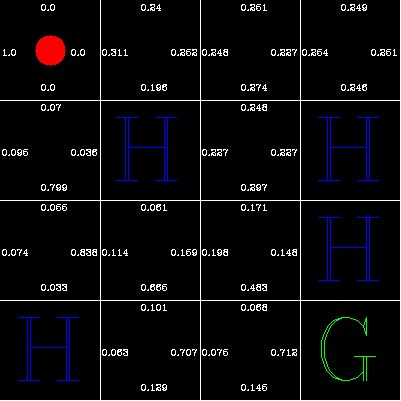

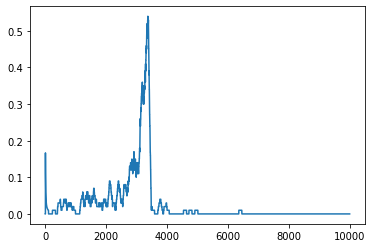

In [ ]:
# 파라미터를 설정해 주자
num_episode = 10000
is_video_save = False
fps = 1
avi_file_name = 'P-rl-3.avi'
# 칭찬할 때 쓰이는 비율이다.
learning_rate = 0.01

# 미끄럽지 않은 환경을 만들어주자
env = gym.make('FrozenLake-v0', is_slippery=False)
# 초기에 각 액션의 확률은 1/4로 맞춰준다.
p_table = np.zeros((16, 4))
for i in range(16):
    for j in range(4):
        p_table[i, j] = 0.25

if (is_video_save):
    fcc = cv2.VideoWriter_fourcc(*'DIVX')
    out = cv2.VideoWriter(avi_file_name, fcc, fps, (401, 401))

reward_list = []
reward_100_average = []

for epi in range(num_episode):
    if (is_video_save):
        txt = 'Episode : '+str(epi)
        for _ in range(3):
            out.write(np.uint8(draw_txt(txt)))
    d = False
    total_reward = 0
    s = env.reset()
    memory = []
    while not d:
        if (is_video_save):
            out.write(np.uint8(draw_state(s, p_table)))
        action = np.random.choice(range(4), p=p_table[s])
        n_s, r, d, _ = env.step(action)
        total_reward = total_reward+r
        # 행동들을 모두 기억하자
        i = (s, action, r, n_s, d)
        memory.append(i)
        s = n_s

    r_sum = 0
    # 기억하는 행동 중 최종 성공을 한 상태와 액션의 확률값을 올려주자
    for _s, _a, _r, _n_s, _d in memory[::-1]:
        r_sum = _r+r_sum
        log_p_table = np.log(p_table[_s])
        log_p_table[_a] = log_p_table[_a]+learning_rate*r_sum
        s_sum = np.sum(np.exp(log_p_table))
        for i in range(4):
            p_table[_s, i] = np.exp(log_p_table[i])/s_sum

    reward_list.append(total_reward)

    if (is_video_save):
        out.write(np.uint8(draw_state(s, p_table)))
    if (total_reward == 1):
        txt = 'Success'
    else:
        txt = 'Fail'
    if (is_video_save):
        for _ in range(3):
            out.write(np.uint8(draw_txt(txt)))
    # print(epi,np.average(reward_list[-100:]))
    reward_100_average.append(np.average(reward_list[-100:]))

if (is_video_save):
    txt = 'Success : '+str(np.sum(reward_list))
    for _ in range(3):
        out.write(np.uint8(draw_txt(txt)))
    out.release()

print('{}번 시도 중 {}번 성공!'.format(num_episode, np.sum(reward_list)))
print('성공률은 {}% 입니다.'.format(round(np.sum(reward_list)/num_episode*100, 2)))
cv2_imshow(draw_state(0, p_table))
plt.plot(reward_100_average)

10000번 시도 중 4481.0번 성공!
성공률은 44.81% 입니다.


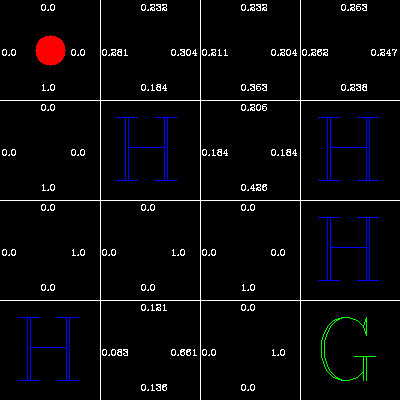

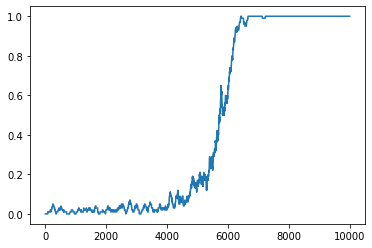

In [ ]:
# 파라미터를 설정해 주자
num_episode = 10000
is_video_save = False
fps = 1
avi_file_name = 'P-rl-4.avi'
# 칭찬할 때 쓰이는 비율이다.
learning_rate = 0.01
discount_rate = 0.9

# 미끄럽지 않은 환경을 만들어주자
env = gym.make('FrozenLake-v0', is_slippery=False)
# 초기에 각 액션의 확률은 1/4로 맞춰준다.
p_table = np.zeros((16, 4))
for i in range(16):
    for j in range(4):
        p_table[i, j] = 0.25

if (is_video_save):
    fcc = cv2.VideoWriter_fourcc(*'DIVX')
    out = cv2.VideoWriter(avi_file_name, fcc, fps, (401, 401))

reward_list = []
reward_100_average = []

for epi in range(num_episode):
    if (is_video_save):
        txt = 'Episode : '+str(epi)
        for _ in range(3):
            out.write(np.uint8(draw_txt(txt)))
    d = False
    total_reward = 0
    s = env.reset()
    memory = []
    while not d:
        if (is_video_save):
            out.write(np.uint8(draw_state(s, p_table)))
        action = np.random.choice(range(4), p=p_table[s])
        n_s, r, d, _ = env.step(action)
        total_reward = total_reward+r
        i = (s, action, r, n_s, d)
        memory.append(i)
        s = n_s

    r_sum = 0
    for _s, _a, _r, _n_s, _d in memory[::-1]:
        # G에 최고의 역할은 한 순서대로 할인된 만큼 확률을 높여준다.
        r_sum = _r+discount_rate*r_sum
        log_p_table = np.log(p_table[_s])
        log_p_table[_a] = log_p_table[_a]+learning_rate*r_sum
        s_sum = np.sum(np.exp(log_p_table))
        for i in range(4):
            p_table[_s, i] = np.exp(log_p_table[i])/s_sum

    reward_list.append(total_reward)

    if (is_video_save):
        out.write(np.uint8(draw_state(s, p_table)))
    if (total_reward == 1):
        txt = 'Success'
    else:
        txt = 'Fail'
    if (is_video_save):
        for _ in range(3):
            out.write(np.uint8(draw_txt(txt)))
    # print(epi,np.average(reward_list[-100:]))
    reward_100_average.append(np.average(reward_list[-100:]))

if (is_video_save):
    txt = 'Success : '+str(np.sum(reward_list))
    for _ in range(3):
        out.write(np.uint8(draw_txt(txt)))
    out.release()

print('{}번 시도 중 {}번 성공!'.format(num_episode, np.sum(reward_list)))
print('성공률은 {}% 입니다.'.format(round(np.sum(reward_list)/num_episode*100, 2)))
cv2_imshow(draw_state(0, p_table))
plt.plot(reward_100_average)

10000번 시도 중 7908.0번 성공!
성공률은 79.08% 입니다.


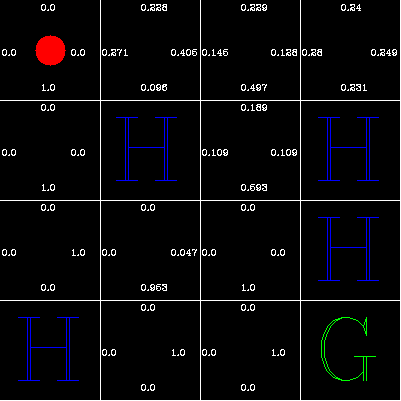

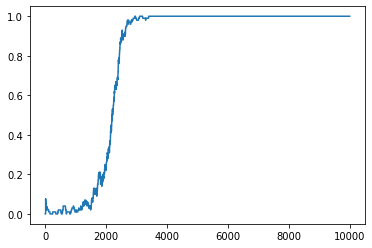

In [ ]:
# 파라미터를 설정해 주자
num_episode = 10000
is_video_save = False
fps = 1
avi_file_name = 'P-rl-5.avi'
# 칭찬할 때 쓰이는 비율이다.
learning_rate = 0.01
discount_rate = 0.9

# 미끄럽지 않은 환경을 만들어주자
env = gym.make('FrozenLake-v0', is_slippery=False)
# 초기에 각 액션의 확률은 1/4로 맞춰준다.
p_table = np.zeros((16, 4))
for i in range(16):
    for j in range(4):
        p_table[i, j] = 0.25

if (is_video_save):
    fcc = cv2.VideoWriter_fourcc(*'DIVX')
    out = cv2.VideoWriter(avi_file_name, fcc, fps, (401, 401))

reward_list = []
reward_100_average = []

for epi in range(num_episode):
    if (is_video_save):
        txt = 'Episode : '+str(epi)
        for _ in range(3):
            out.write(np.uint8(draw_txt(txt)))
    d = False
    total_reward = 0
    s = env.reset()
    memory = []
    while not d:
        if (is_video_save):
            out.write(np.uint8(draw_state(s, p_table)))
        action = np.random.choice(range(4), p=p_table[s])
        n_s, r, d, _ = env.step(action)
        total_reward = total_reward+r
        i = (s, action, r, n_s, d)
        memory.append(i)
        s = n_s

    r_sum = 0
    for _s, _a, _r, _n_s, _d in memory[::-1]:
        r_sum = _r+discount_rate*r_sum
        log_p_table = np.log(p_table[_s])
        log_p_table[_a] = log_p_table[_a]+learning_rate*r_sum/(p_table[_s, _a]+0.01)
        s_sum = np.sum(np.exp(log_p_table))
        for i in range(4):
            p_table[_s, i] = np.exp(log_p_table[i])/s_sum

    reward_list.append(total_reward)

    if (is_video_save):
        out.write(np.uint8(draw_state(s, p_table)))
    if (total_reward == 1):
        txt = 'Success'
    else:
        txt = 'Fail'
    if (is_video_save):
        for _ in range(3):
            out.write(np.uint8(draw_txt(txt)))
    # print(epi,np.average(reward_list[-100:]))
    reward_100_average.append(np.average(reward_list[-100:]))

if (is_video_save):
    txt = 'Success : '+str(np.sum(reward_list))
    for _ in range(3):
        out.write(np.uint8(draw_txt(txt)))
    out.release()

print('{}번 시도 중 {}번 성공!'.format(num_episode, np.sum(reward_list)))
print('성공률은 {}% 입니다.'.format(round(np.sum(reward_list)/num_episode*100, 2)))
cv2_imshow(draw_state(0, p_table))
plt.plot(reward_100_average)

30000번 시도 중 6381.0번 성공!
성공률은 21.27% 입니다.


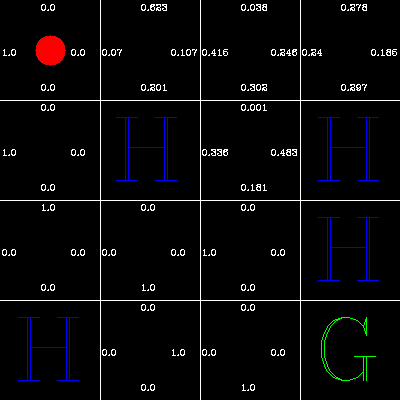

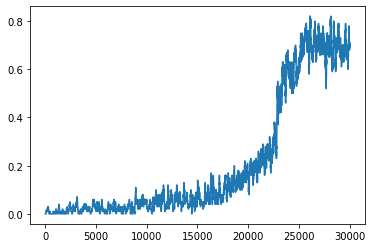

In [ ]:
# 파라미터를 설정해 주자
num_episode = 30000
is_video_save = False
fps = 1
avi_file_name = 'P-rl-6.avi'
# 칭찬할 때 쓰이는 비율이다.
learning_rate = 0.01
discount_rate = 0.9

# 미끄러운 환경을 만들어주자
env = gym.make('FrozenLake-v0', is_slippery=True)
# 초기에 각 액션의 확률은 1/4로 맞춰준다.
p_table = np.zeros((16, 4))
for i in range(16):
    for j in range(4):
        p_table[i, j] = 0.25

if (is_video_save):
    fcc = cv2.VideoWriter_fourcc(*'DIVX')
    out = cv2.VideoWriter(avi_file_name, fcc, fps, (401, 401))

reward_list = []
reward_100_average = []

for epi in range(num_episode):
    if (is_video_save):
        txt = 'Episode : '+str(epi)
        for _ in range(3):
            out.write(np.uint8(draw_txt(txt)))
    d = False
    total_reward = 0
    s = env.reset()
    memory = []
    while not d:
        if (is_video_save):
            out.write(np.uint8(draw_state(s, p_table)))
        action = np.random.choice(range(4), p=p_table[s])
        n_s, r, d, _ = env.step(action)
        total_reward = total_reward+r
        i = (s, action, r, n_s, d)
        memory.append(i)
        s = n_s

    r_sum = 0
    for _s, _a, _r, _n_s, _d in memory[::-1]:
        r_sum = _r+discount_rate*r_sum

        log_p_table = np.log(p_table[_s])
        log_p_table[_a] = log_p_table[_a]+learning_rate*r_sum/(p_table[_s, _a]+0.01)
        s_sum = np.sum(np.exp(log_p_table))
        for i in range(4):
            p_table[_s, i] = np.exp(log_p_table[i])/s_sum

    reward_list.append(total_reward)

    if (is_video_save):
        out.write(np.uint8(draw_state(s, p_table)))
    if (total_reward == 1):
        txt = 'Success'
    else:
        txt = 'Fail'
    if (is_video_save):
        for _ in range(3):
            out.write(np.uint8(draw_txt(txt)))
    # print(epi,np.average(reward_list[-100:]))
    reward_100_average.append(np.average(reward_list[-100:]))

if (is_video_save):
    txt = 'Success : '+str(np.sum(reward_list))
    for _ in range(3):
        out.write(np.uint8(draw_txt(txt)))
    out.release()

print('{}번 시도 중 {}번 성공!'.format(num_episode, np.sum(reward_list)))
print('성공률은 {}% 입니다.'.format(round(np.sum(reward_list)/num_episode*100, 2)))
cv2_imshow(draw_state(0, p_table))
plt.plot(reward_100_average)